I was trying to make unittests to task target_en (6th week). And the start point was 0.33/1.00 and start code I attached below.

In [ ]:
"""
Target name in English
"""
import random


def generate_grid() -> list[list[str]]:
    """
    Generates list of lists of letters - i.e. grid for the game.
    e.g. [['I', 'G', 'E'], ['P', 'I', 'S'], ['W', 'M', 'G']]
    """
    vowels = 'AEIOU'
    consonants = 'BCDFGHJKLMNPQRSTVWXYZ'
    random_letters = []
    output = []
    for i in range(6):
        random_letters.append(random.choice(consonants))

    for i in range(3):
        random_letters.append(random.choice(vowels))
    for i in range(3):
        lst = []
        for j in range(3):
            lst.append(random_letters[i*3 + j])
        output.append(lst)
    return output


def get_words(f: str, letters: list[str]) -> list[str]:
    """
    Reads the file f. Checks the words with rules and returns a list of words.
    """
    if isinstance(f, str) and isinstance(letters, list):
        central = letters[4]

        with open (f, "r", encoding = "utf-8") as file:
            lines = file.readlines()

        letters_lower = ""
        for letter in letters:
            letters_lower += letter.lower()

        all_possible_words = []
        for word in lines:
            word = word.strip()
            checked = letters_lower
            if (4 <= len(word) <= 9) and (central in word):
                is_possible_word = True
                for letter in word:
                    if letter in checked:
                        checked = checked.replace(letter, "")
                    else:
                        is_possible_word = False
                        break
                if is_possible_word:
                    all_possible_words.append(word)
        return all_possible_words
def get_user_words() -> list[str]:
    """
    Gets words from user input and returns a list with these words.
    Usage: enter a word or press ctrl+d to finish for *nix or Ctrl-Z+Enter 
    for Windows.
    Note: the user presses the enter key after entering each word.
    """
    lst = []
    while True:
        try:
            word = input()
            if word == '':
                break
            lst.append(word)
        except EOFError:
            break
    return lst
def get_pure_user_words(user_words: list[str], letters: list[str],\
words_from_dict: list[str]) -> list[str]:
    """
    Checks user words with the rules and returns list of those words
    that are not in dictionary.
    """
    wrong_words = []

    for word in user_words:
        if word not in words_from_dict:
            wrong_words.append(word)

    return wrong_words
def main():
    """
    Body of the function
    """
    grid = generate_grid()
    print("Game grid is: ")
    for item in grid:
        row = ''
        for letter in item:
            row += letter + ' '
        print(row)
    print("Enter a word or press ctrl+d to finish for *nix or Ctrl-Z+Enter for Windows.")

    letters = []
    for item in grid:
        for letter in item:
            letters.append(letter.lower())

    user_words = get_user_words()
    all_words = get_words("en.txt", letters)

    missed_words = []
    wrong_words = get_pure_user_words(user_words, letters, all_words)

    for word in all_words:
        if word not in user_words:
            missed_words.append(word)

    print("Number of the right words:", len(user_words) - len(wrong_words))

    print("All possible words:")
    print(all_words)

    print("You missed the following words:")
    print(missed_words)

    print("You suggest, but we don`t have them in dictionary:")
    print(wrong_words)


My first requests consists of condition of the problem, code and ask for unittests to find critical points. And firstly it provided me only text output so I make an emphasis to give me unittests in code format. And the response was unittests below.

In [ ]:
import unittest
from target_en import generate_grid, get_words, get_user_words, get_pure_user_words

class TestWordFindGame(unittest.TestCase):

  def test_invalid_user_input(self):
    # Mock user input with invalid values
    user_inputs = ["123", "!@#$", "", None]
    expected_output = []
    
    # Patch get_user_words to return mocked input
    with patch('your_program.get_user_words', side_effect=lambda: user_inputs):
      actual_output = get_user_words()
    
    self.assertEqual(actual_output, expected_output)

  def test_incorrect_file_path(self):
    # Mock invalid file path
    invalid_path = "invalid_path/en.txt"
    
    # Expected error message
    expected_error = "Error opening file"
    
    # Wrap get_words in a try-except block to catch the error
    with self.assertRaises(Exception) as error:
      get_words(invalid_path, ["a", "b", "c"])
    
    # Check if the error message contains the expected text
    self.assertTrue(expected_error in str(error.exception))

  def test_empty_dictionary_file(self):
    # Create an empty temporary dictionary file
    with open("empty_dict.txt", "w") as f:
      pass
    
    # Expected output (empty list)
    expected_output = []
    
    actual_output = get_words("empty_dict.txt", ["a", "b", "c"])
    
    # Remove the temporary file
    os.remove("empty_dict.txt")
    
    self.assertEqual(actual_output, expected_output)

  def test_incorrect_word_format(self):
    # Create a temporary dictionary with invalid words
    with open("invalid_words.txt", "w") as f:
      f.write("WORD1\nWoRd2\n3lETTER\n")
    
    # Expected output (should only contain central letter word)
    expected_output = ["word1"]
    
    actual_output = get_words("invalid_words.txt", ["w", "o", "r", "d", "1"])
    
    # Remove the temporary file
    os.remove("invalid_words.txt")
    
    self.assertEqual(actual_output, expected_output)

  def test_insufficient_vowels(self):
    # Modify generate_grid to return a grid with less than 3 vowels
    original_generate_grid = generate_grid

    def modified_generate_grid():
      grid = original_generate_grid()
      # Remove a vowel from the grid
      grid[0][0] = "X"
      return grid
    
    # Patch generate_grid with the modified version
    with patch('your_program.generate_grid', side_effect=modified_generate_grid):
      grid = generate_grid()
    
    # Check if the grid has at least 3 vowels
    vowel_count = 0
    for row in grid:
      for letter in row:
        if letter in "AEIOU":
          vowel_count += 1
    
    self.assertGreaterEqual(vowel_count, 3)

  def test_duplicate_words(self):
    # Create a temporary dictionary with duplicate words
    with open("duplicate_words.txt", "w") as f:
      f.write("WORD\nWord\nWORD\n")
    
    # Expected output (should remove duplicates)
    expected_output = ["word"]
    
    actual_output = get_words("duplicate_words.txt", ["w", "o", "r", "d"])
    
    # Remove the temporary file
    os.remove("duplicate_words.txt")
    
    self.assertEqual(actual_output, expected_output)

  # Test for case sensitivity can be done manually by entering words with different cases

if __name__ == "__main__":
  unittest.main()


First of all, it fails as there was input() so I deleted unittests for get_user_words() function.

Unfortunately, tests failed.

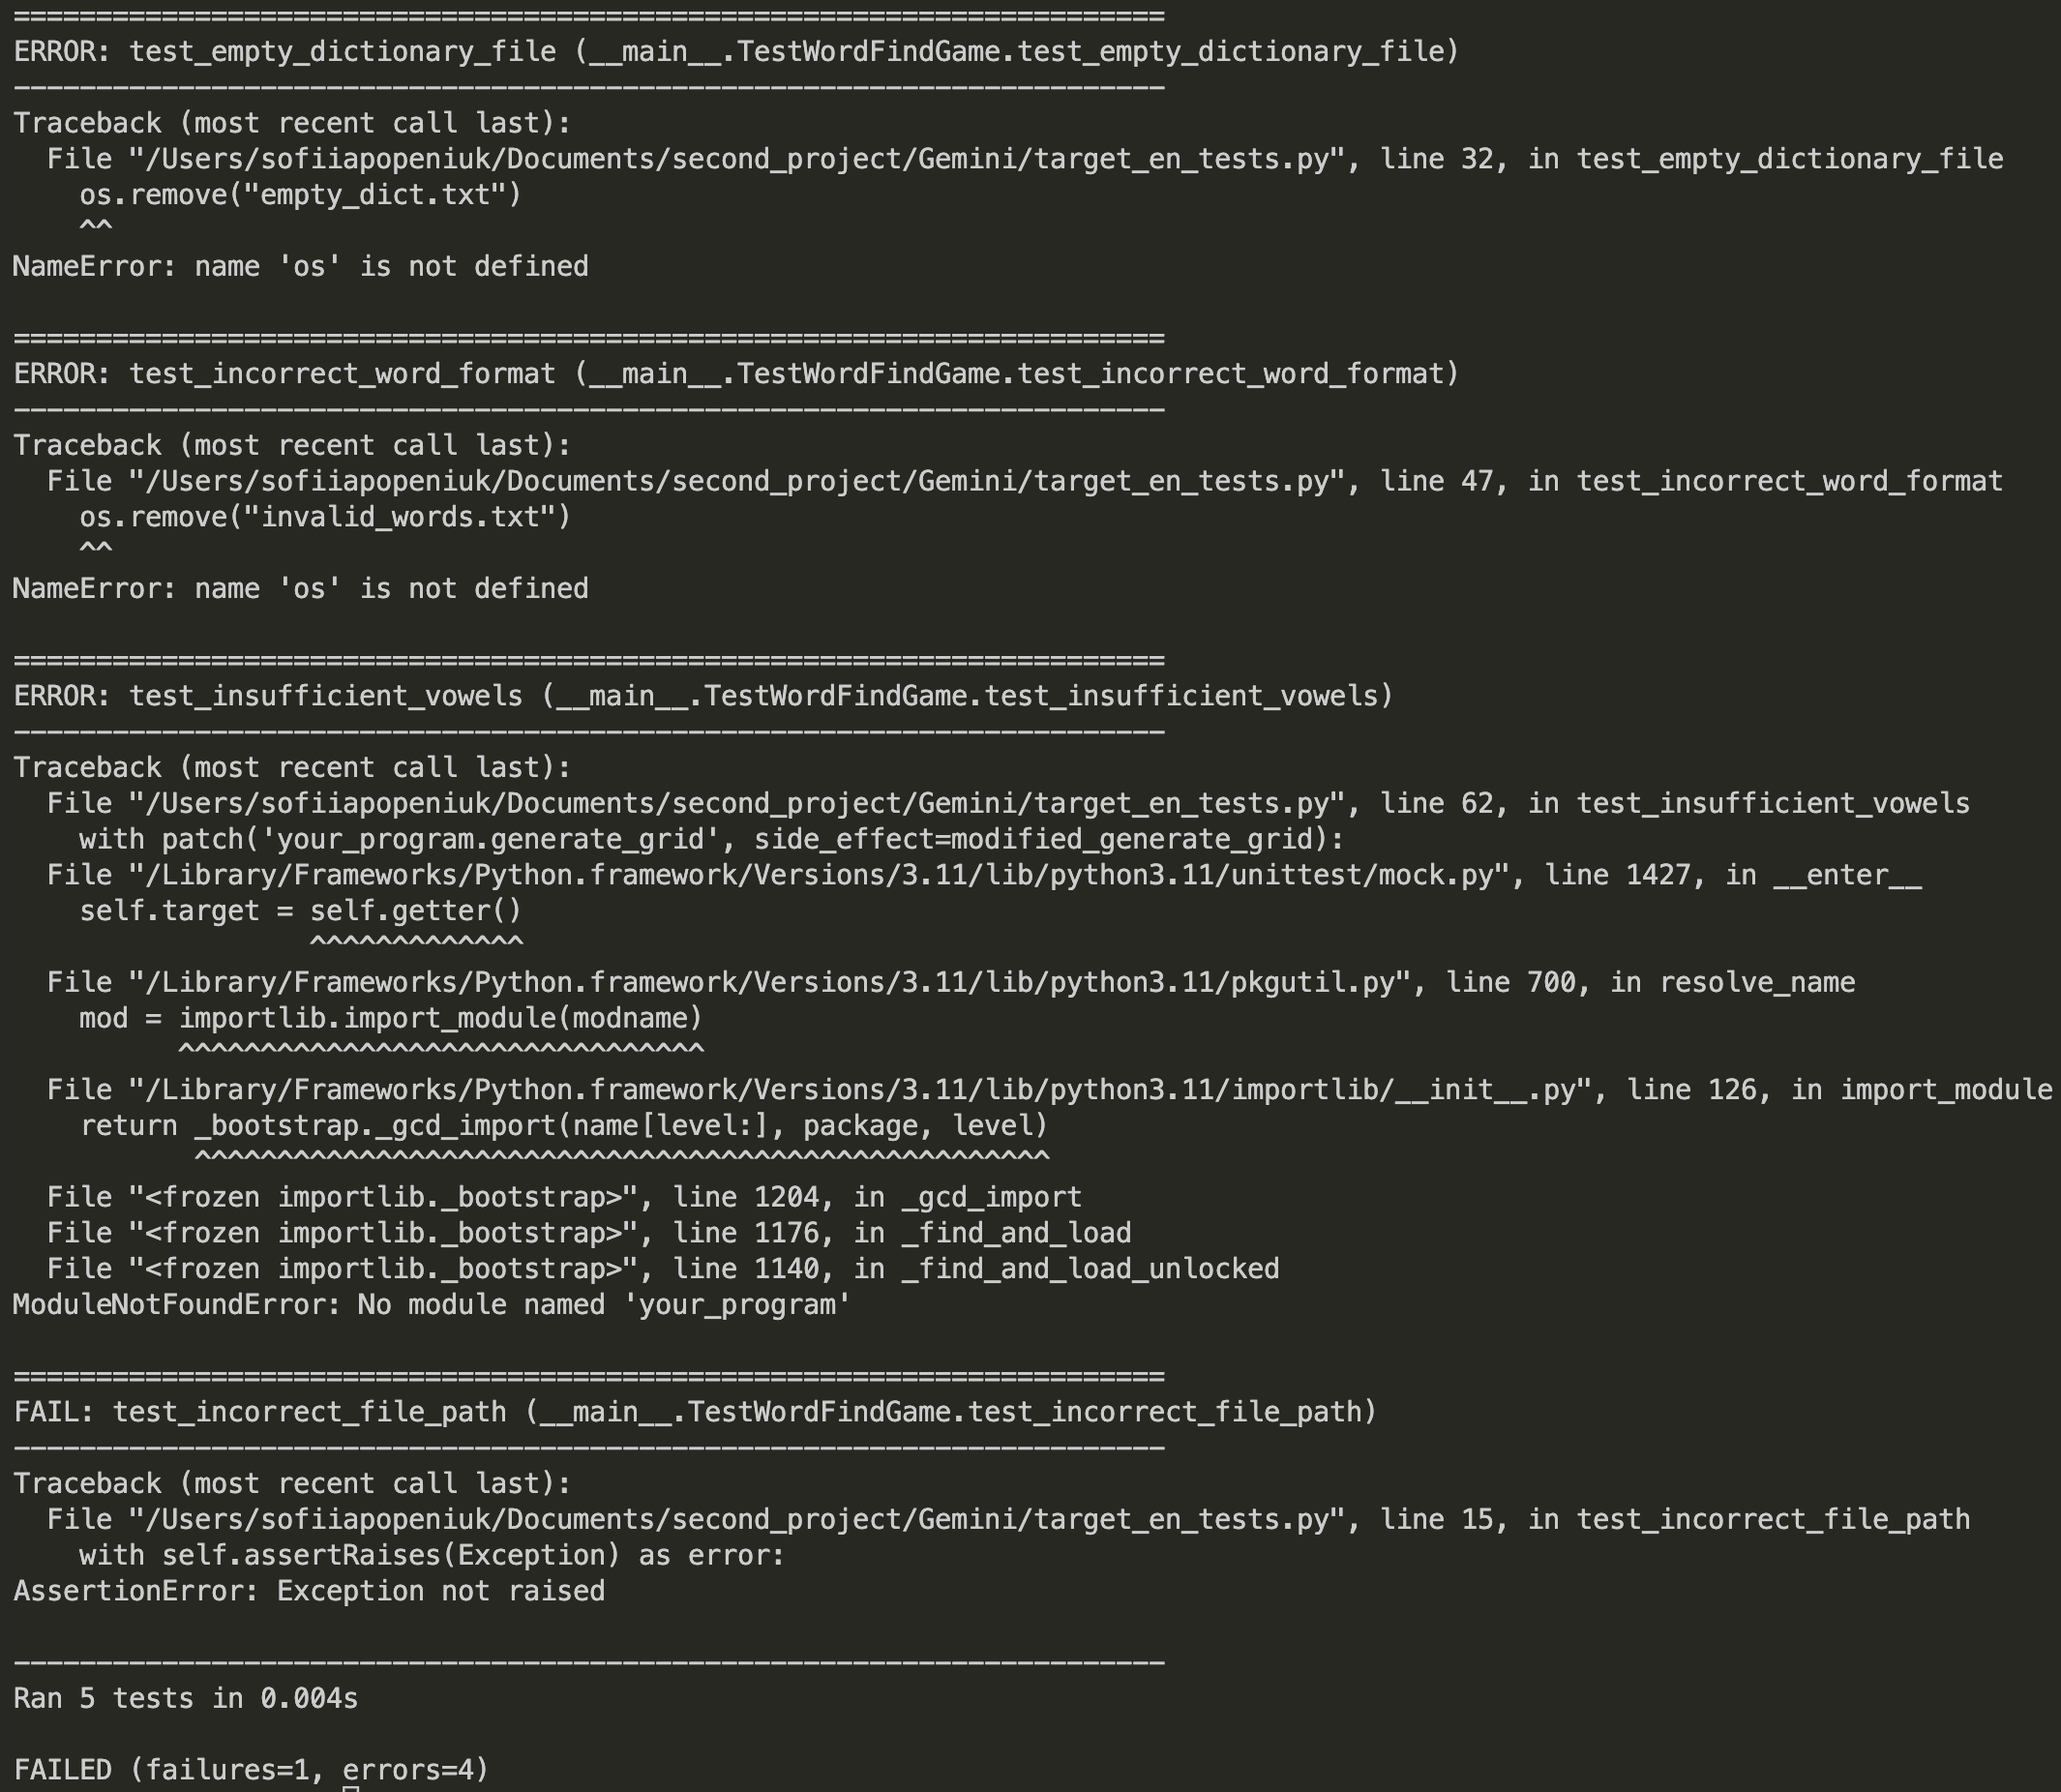

I ask Gemini to correct unittests. And it asked to install unittest.mock but even with virtual environment I couldn't do that. I ask Gemini for unittests without this library, but it gives me instructions for installing unittest.mock. I tried all of them but it didn't help to install that library.